In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("D:\diabetes1.csv")

In [3]:
data.sample(5) #checking random datasets

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
629,4,94,65,22,0,24.7,0.148,21,0
615,3,106,72,0,0,25.8,0.207,27,0
120,0,162,76,56,100,53.2,0.759,25,1
512,9,91,68,0,0,24.2,0.200,58,0
236,7,181,84,21,192,35.9,0.586,51,1


In [4]:
data.shape

(768, 9)

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#Here all data are filled but still lets check
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#We are confirmed that there is no NANS but the data in some columns look fishy lets visualise and check the default

In [7]:
#Lets import visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

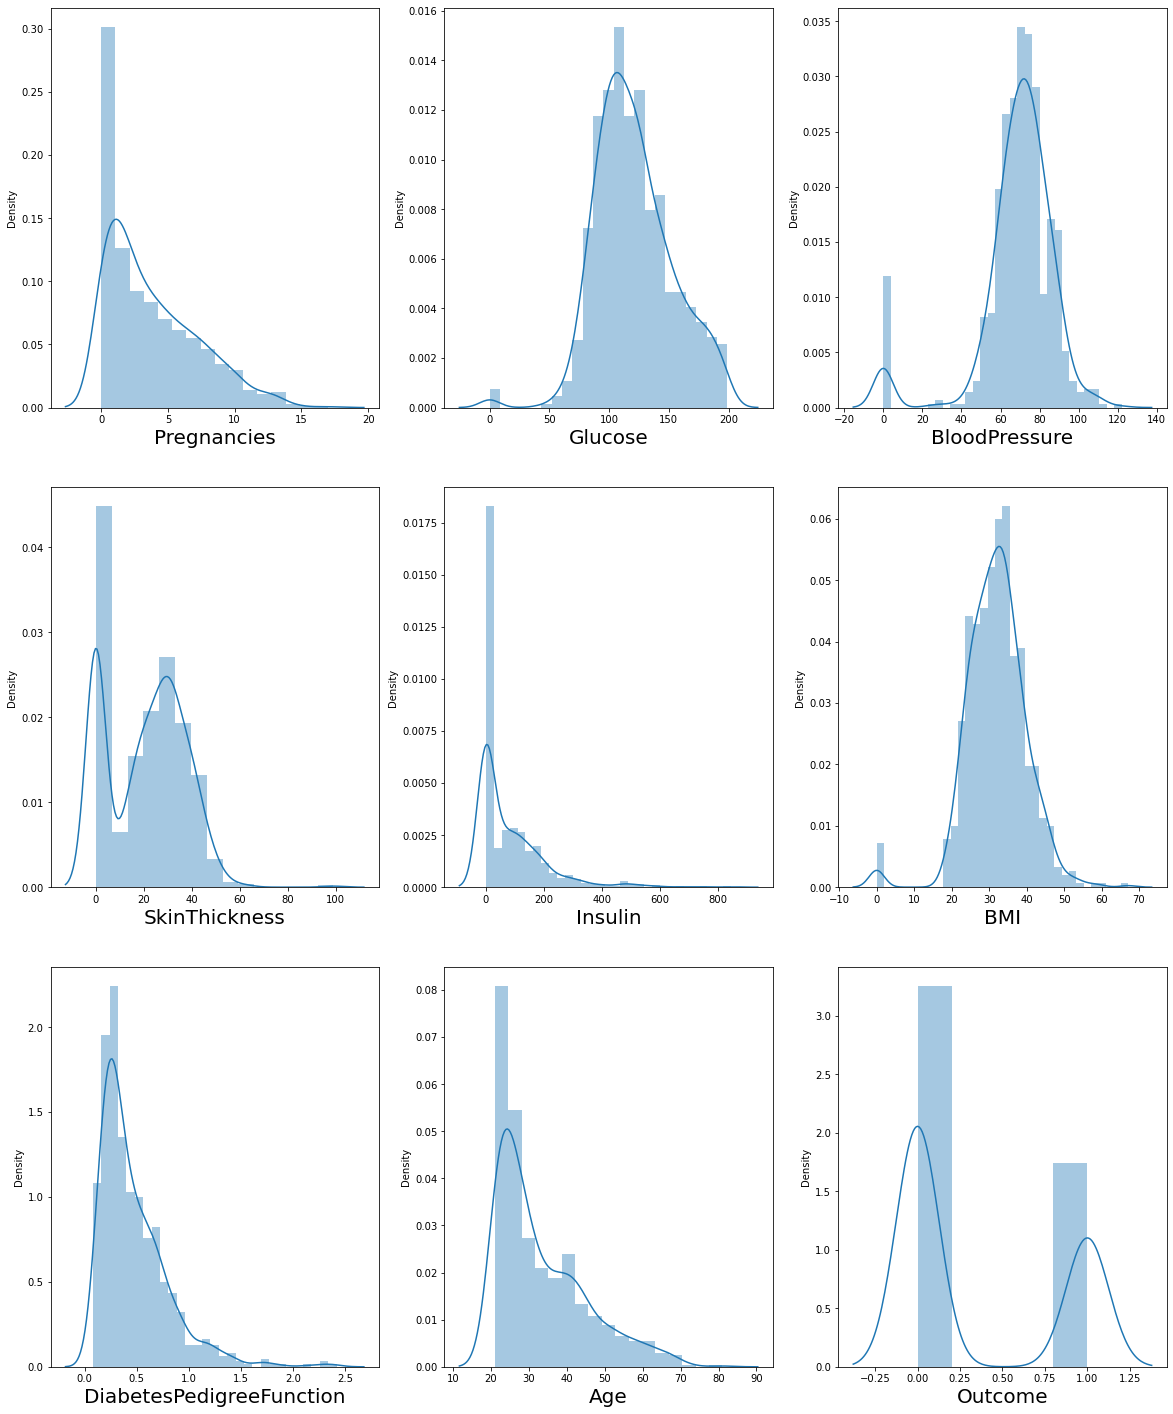

In [8]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax= plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()
            
        
        

In [ ]:
#AS we can see there is some skewness with the data lets deal with it
#also we can see that few data from columns such as Glucose,,Blood Pressure,skin thickess,insulin ,BMI,which have
#values zero whuch is not possible from our knowledge of that features,
# So since we have less data points what we will do it replace it with the mean rather than deleting it.

In [10]:
data.columns #displaying the column names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean()) #Making  changes permanently
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())





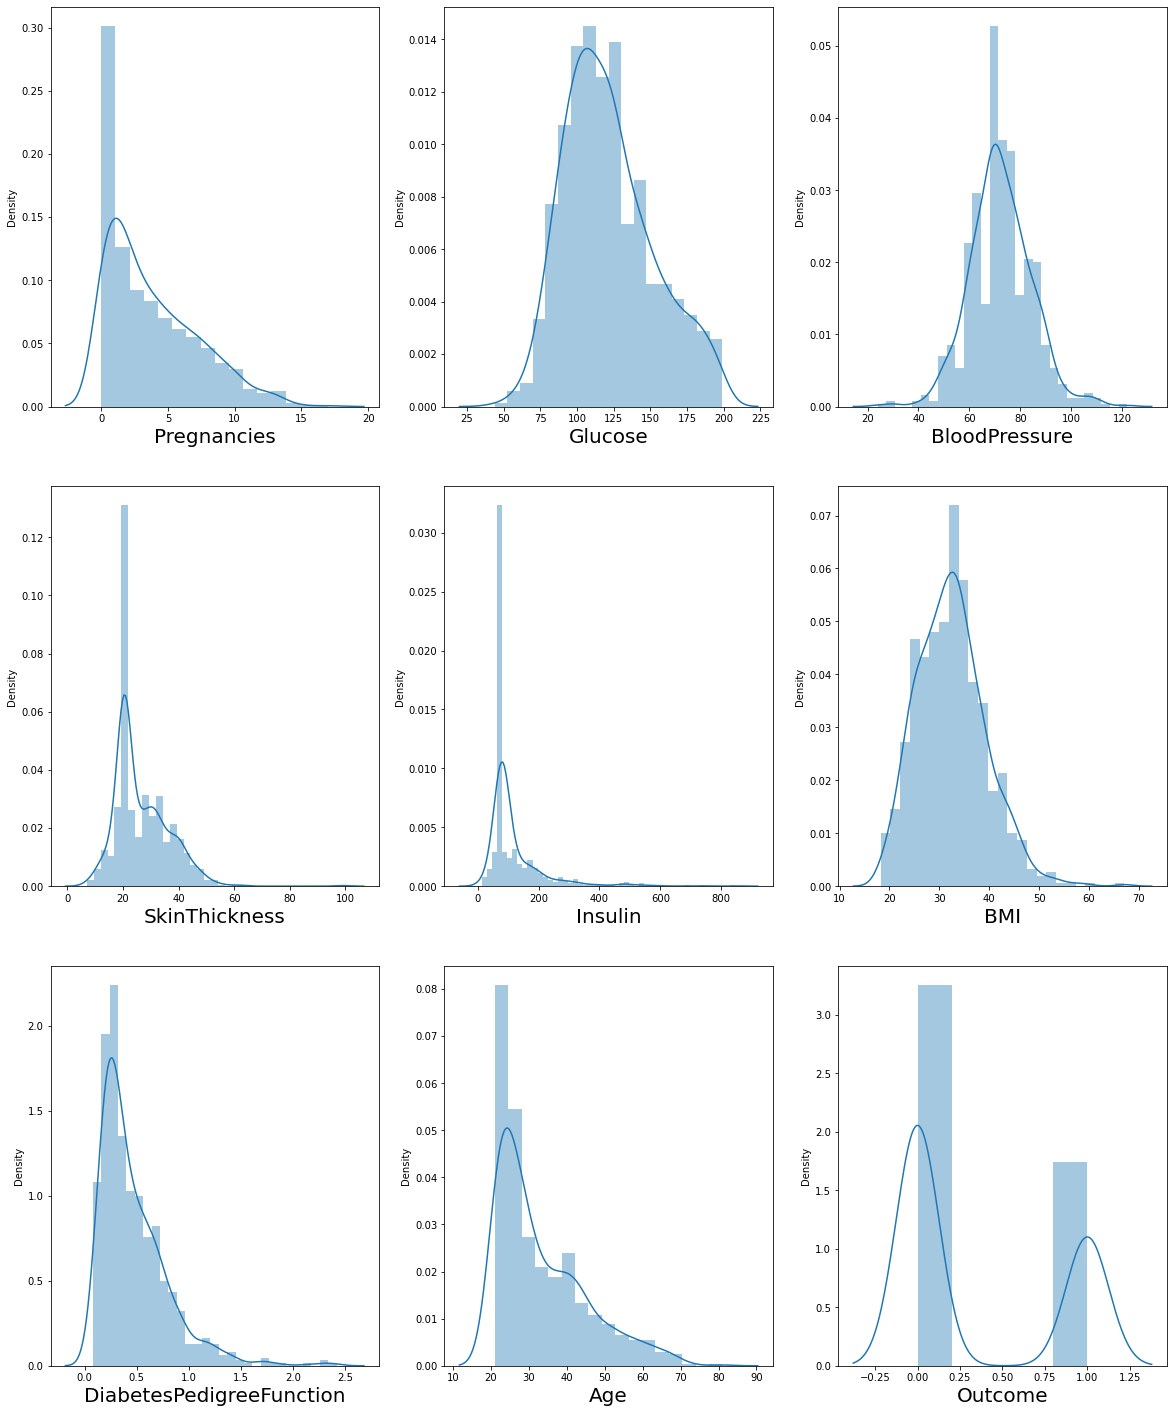

In [10]:
#Lets check the changes :
plt.figure(figsize=(20,25))
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax= plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()
            


In [ ]:
#SO the problems with wrong data in those columns have been dealt with
#Now we can  still see that there is some skewness in the data lets deal with that with some other visualisation technique



In [11]:
data_features=data.drop(columns=['Outcome'])

In [12]:
data_features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


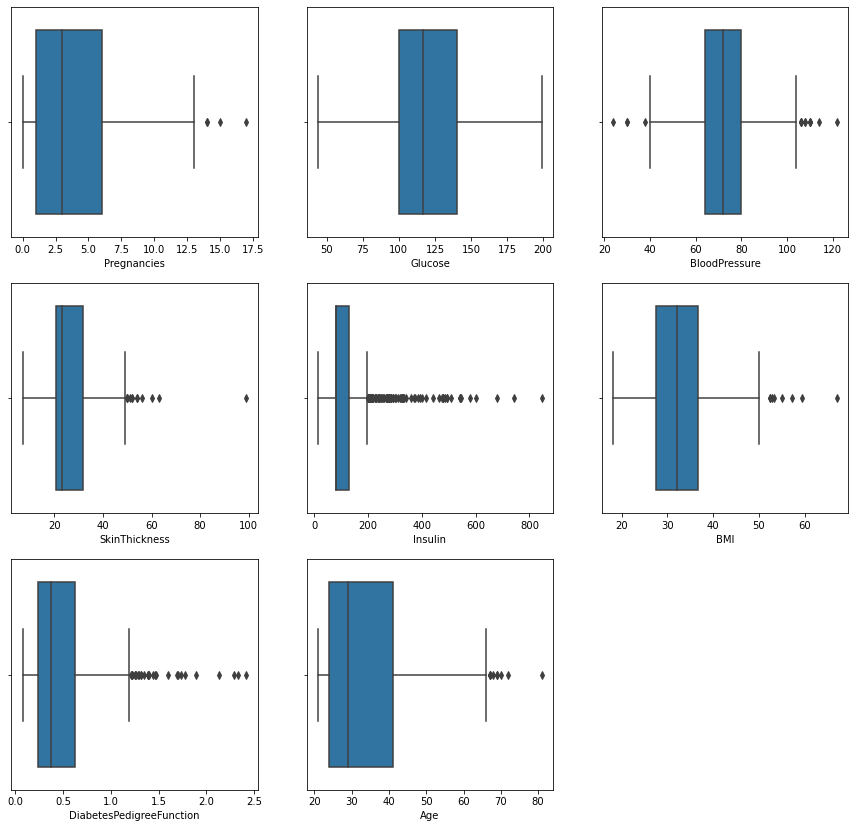

In [13]:
plt.figure(figsize=(15,50))
graph=1
for column in data_features:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(data_features[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [14]:
data.shape

(768, 9)

In [17]:
# We make the following observation from the data
#1.Only Glucose does not have outliers
#2,upper outlier are there in PREGNANCIES,SKINTHICKNESS,INSULIN,BMI,DPF<AGE
#3.These columnhave both upper and lower level outliers: BLOODPRESSURE,

In [ ]:
#LETS deal #2 cases first.

In [16]:

q1=data.quantile(.25)   #1st quantile of each features will be displayed
q3=data.quantile(.75)   #3rd quantile of each features will be displayed
iqr=q3-q1              #iqr of all features will be displayed
iqr

Pregnancies                  5.000000
Glucose                     40.500000
BloodPressure               16.000000
SkinThickness               11.463542
Insulin                     47.450521
BMI                          9.100000
DiabetesPedigreeFunction     0.382500
Age                         17.000000
Outcome                      1.000000
dtype: float64

In [17]:
#Validating the outlier
preg_high=(q3.Pregnancies+(1.5*iqr.Pregnancies)) #we are using iqr values of pregnancies from iqr to see the higher range
preg_high

13.5

In [18]:
index=np.where(data['Pregnancies']>preg_high) #Finding the index where higher range data exists in pregnancies
index

(array([ 88, 159, 298, 455], dtype=int64),)

In [19]:
data=data.drop(data.index[index]) # these index rows will be deleted from main data

In [21]:
data.shape #After deleting we can confirm that we have left with 764 rows and outliers are deleted

(764, 9)

In [22]:
data.reset_index() # since  4 rows are deleted index are puzzled so  we reaarange the data

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
759,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
760,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
761,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
762,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [23]:
#For SkinThickness upper outlier
skin_high=q3.SkinThickness + (1.5*iqr.SkinThickness)
skin_high

49.1953125

In [24]:
#From the boxplot diagram we made suure that from this skin_high point the other points are outlier
indexs=np.where(data['SkinThickness']>skin_high)
indexs

(array([ 57,  86,  98, 119, 149, 209, 271, 273, 442, 528, 575, 587],
       dtype=int64),)

In [25]:
#Lets delete the indexes from the data where skin thickness is outlier
data=data.drop(data.index[indexs])

In [26]:
data.shape #earlier there were 764 rows ,12 more are deleted we are left with 752,#lets check this

(752, 9)

In [27]:
#for Insulin upper outliers
insu_upper=q3.Insulin+(1.5*iqr.Insulin)
insu_upper

198.42578125

In [28]:
indexi=np.where(data['Insulin']>insu_upper)
indexi

(array([  8,  13,  16,  20,  31,  39,  43,  53,  54,  56,  72,  92, 107,
        127, 134, 139, 147, 155, 179, 188, 192, 199, 207, 212, 220, 223,
        239, 240, 246, 250, 269, 276, 277, 286, 287, 298, 309, 324, 348,
        349, 353, 359, 364, 377, 381, 384, 398, 401, 404, 413, 414, 440,
        445, 467, 472, 473, 474, 498, 506, 524, 526, 531, 532, 541, 547,
        560, 569, 578, 590, 592, 596, 629, 639, 641, 646, 657, 663, 669,
        679, 684, 691, 694, 697, 699, 705, 732, 737], dtype=int64),)

In [29]:
data=data.drop(data.index[indexi])

In [30]:
data.shape#752-87=665 rows will be left

(665, 9)

In [31]:
#Lets do for bmi
bmi_high=q3.BMI+(1.5*iqr.BMI)
indexb=np.where(data['BMI']>bmi_high)
data=data.drop(data.index[indexb])
data.shape

(661, 9)

In [32]:
#Lets do for DiabetesPedigreeFunction 
dpf_high=q3.DiabetesPedigreeFunction+(1.5*iqr.DiabetesPedigreeFunction)
indexdpf=np.where(data['DiabetesPedigreeFunction']>dpf_high)
data=data.drop(data.index[indexdpf])
data.shape

(638, 9)

In [33]:
#Lets do it for Age
Age_high=q3.Age+(1.5*iqr.Age)
indexage=np.where(data['Age']>Age_high)
data=data.drop(data.index[indexage])
data.shape

(629, 9)

In [34]:
#Lets deal with BloodPressure as it contains both upper outlier and lower outlier
blood_high=q3.BloodPressure+(1.5*iqr.BloodPressure)
indexb=np.where(data['BloodPressure']>blood_high)
data=data.drop(data.index[indexb])
data.shape

(622, 9)

In [35]:
# for lower fence
blood_low=q1.BloodPressure-(1.5*iqr.BloodPressure)
indexbl=np.where(data['BloodPressure']<blood_low)
data=data.drop(data.index[indexbl])
data.shape

(619, 9)

In [36]:
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
614,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
615,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
616,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
617,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


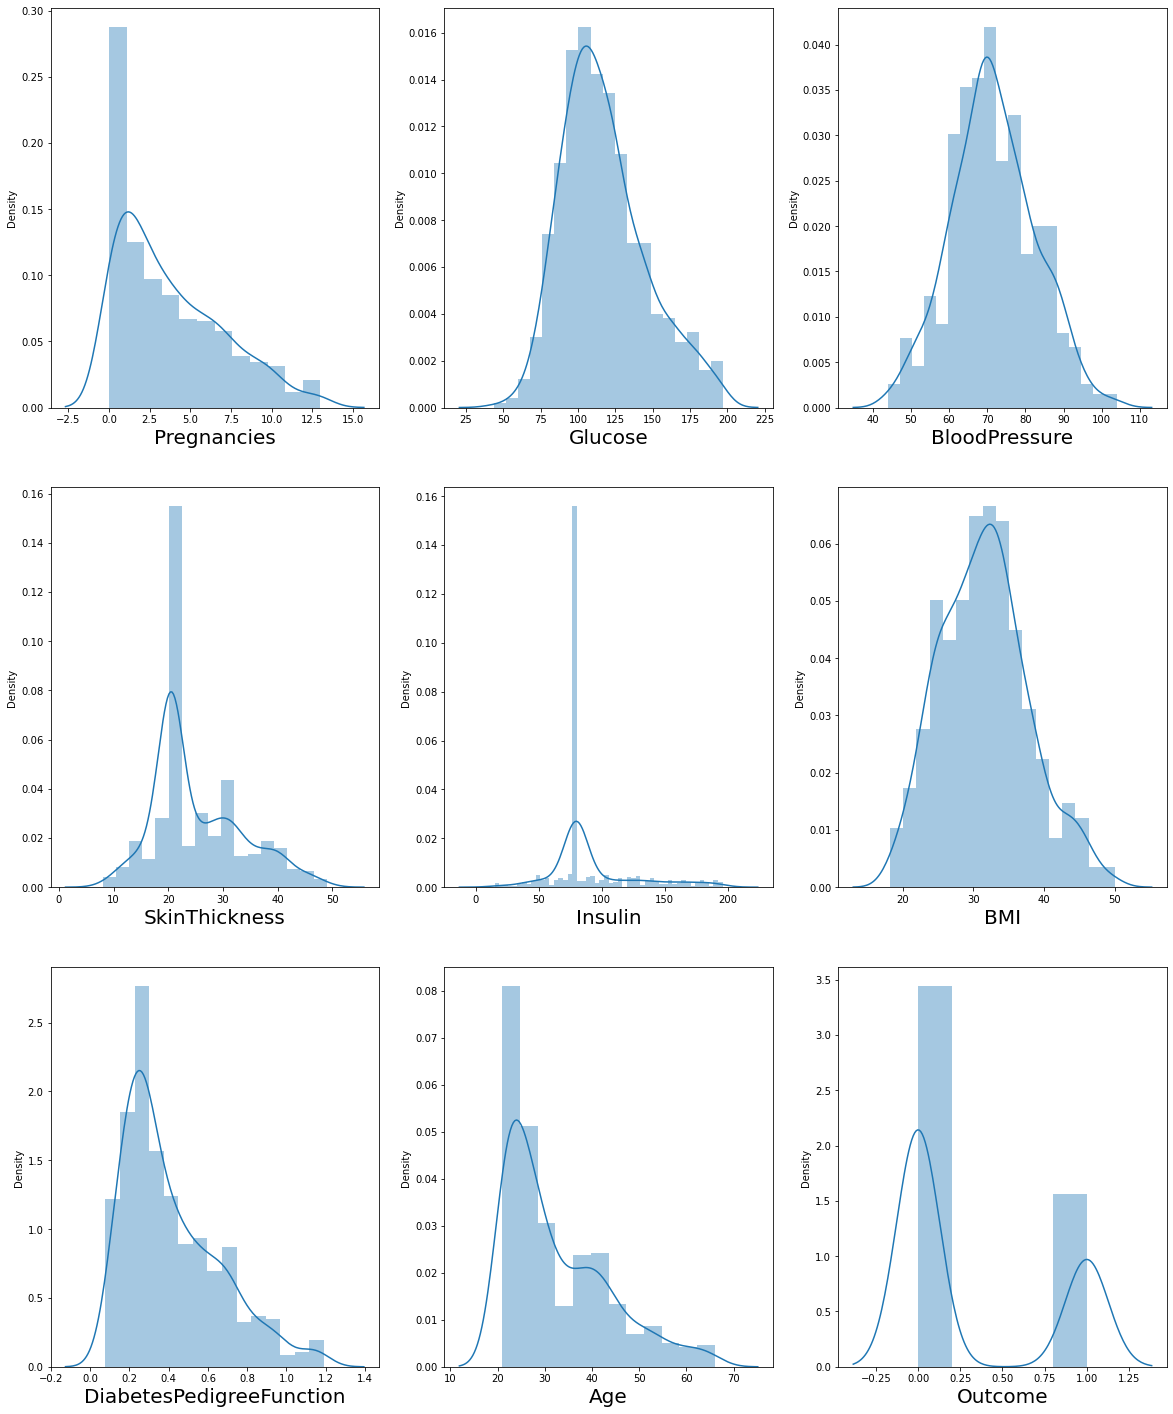

In [37]:
#Now we have removed all the outliers lets visualise the data now
plt.figure(figsize=(20,25))
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax= plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


In [ ]:
#As we can see the data distribution looks much better now
# SO before we fit data to a model lets visualise the relationship between our independdent variables and the label(category)

In [38]:
X=data.drop(columns=['Outcome'])

In [39]:
y=data['Outcome']

In [ ]:
#Now lets visualise how features are connected to label

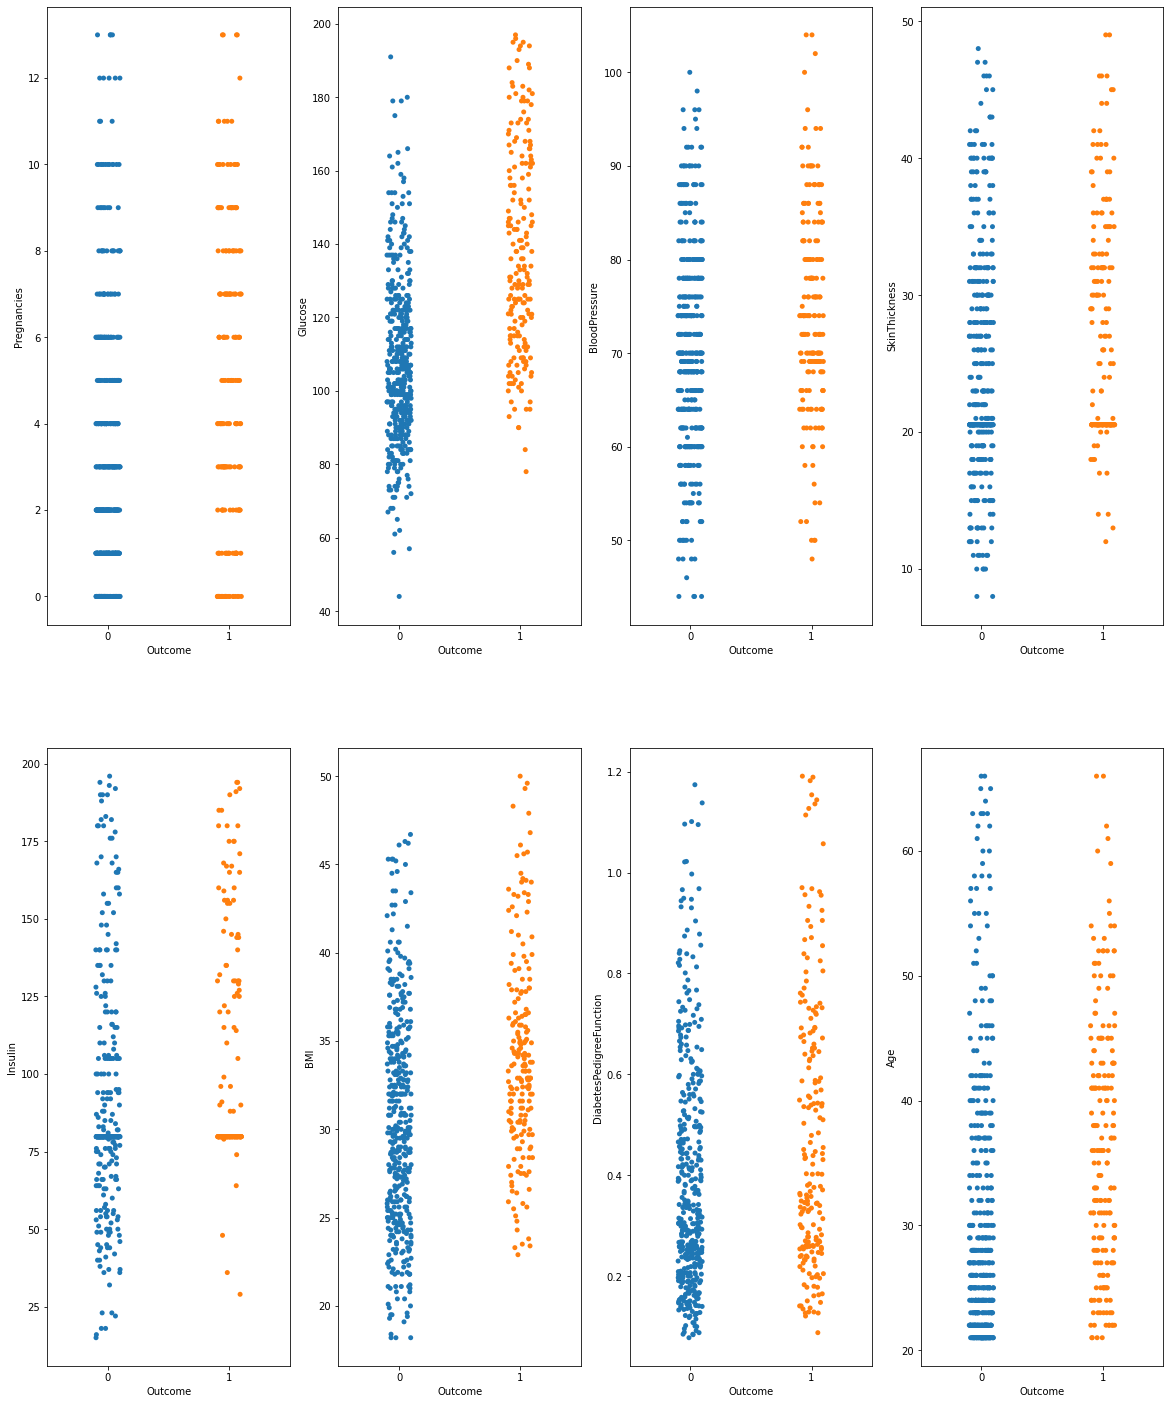

In [40]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in X:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.show()
        
        
        


In [ ]:
#From the above striplot we assume that all features are connected to the label and hence we do not drop any variables/features

In [ ]:
#Great lets proceed by checkin the multicollinearity in the dependent variable,beforr that lets scale our 
#Now we check whether features and features are corelated or not as if it is corelated be delete that feature as it will cause
# overfitting
#Finding variance inflation factor in each scaled column i.e X_scaled.shape[1](1/(1-R2))
#Variance influence factor will give each feature corelation with other features by taking that particular
#feature as label and treatring other features as dependent variables and gives the vif score with the help of 
#adjusted R sqaure and thus we will be able to find its importance wrt other features and if vif score>5 we drop that feature

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)


In [43]:
X_scaled #This is how our data looks like after standrisation ,#remember the weightage remains the same and the 
#calculation speed also increases

array([[ 0.68261737,  1.09175498,  0.03430374, ...,  0.3291024 ,
         0.86092316,  1.59493212],
       [-0.86628347, -1.14945302, -0.51362487, ..., -0.79544459,
        -0.26714798, -0.1367884 ],
       [ 1.3021777 ,  2.33687054, -0.69626775, ..., -1.32558817,
         1.0448478 , -0.04564521],
       ...,
       [ 0.3728372 ,  0.13123727,  0.03430374, ..., -0.85970442,
        -0.7003927 , -0.22793158],
       [-0.86628347,  0.30911092, -1.06155349, ..., -0.2331711 ,
        -0.27532241,  1.32150256],
       [-0.86628347, -0.86485518, -0.14833913, ..., -0.18497622,
        -0.4142877 , -0.86593388]])

In [44]:
#Lets find if we find some multicollineraity between varianles
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [45]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns

In [46]:
vif

,vif,Features
0,1.448654,Pregnancies
1,1.250247,Glucose
2,1.258898,BloodPressure
3,1.411508,SkinThickness
4,1.200759,Insulin
5,1.447599,BMI
6,1.038530,DiabetesPedigreeFunction
7,1.659799,Age


In [ ]:
#As a convention we follow that if vif >5 for any feature that time only other features are contributing to it.(i.e there are no
#collinearity)
#Since all the values of vifare less than 5 so we do not drop any feature and go ahead to the fitting phase of the model 

In [47]:
#Lets import necessary things
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score



In [48]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=355)

In [49]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [50]:
y_pred=log_reg.predict(x_test)

In [51]:
accuracy=accuracy_score(y_test,y_pred)#comparing actual with predicted
accuracy #Accuracy means how much we can trust our model

0.7612903225806451

In [52]:
#Lets visualise the confusion_matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[94, 11],
       [26, 24]], dtype=int64)

In [ ]:
#out of 11 non positive cases model  predicted them positive
#out of 26  cases which are actually positive model predicted them as negative

In [55]:
from sklearn.metrics import recall_score,precision_score,f1_score

In [56]:
recall_score(y_test,y_pred) #From actual positive cases how much percent our model has predicted correctly

0.48

In [57]:
precision_score(y_test,y_pred)#From all positive prediction how many of them are actually correct

0.6857142857142857

In [53]:
#Now lets check how our model will perform with differnt algorithms,
#So,lets import some algorithms

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_roc_curve


In [57]:
#Lets train all the models
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()

In [58]:
log_reg.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
#Individual metrics to validate highest score with AUC in ROC

In [59]:
log_reg.score(x_test,y_test)

0.7612903225806451

In [60]:
dt.score(x_test,y_test)

0.7032258064516129

In [61]:
rf.score(x_test,y_test)

0.7677419354838709

In [62]:
knn.score(x_test,y_test)

0.7032258064516129

In [ ]:
#We can see that despite same datasets in for all the algorithms the score are differnt which indicates that all algorithms have
#their own way to identify the pattern

In [ ]:
#Lets plot the ROC AUC curve

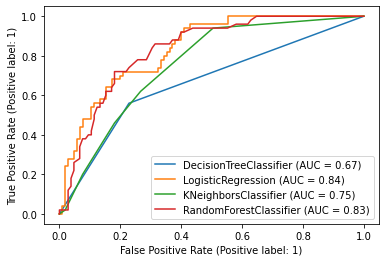

In [63]:
disp=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(log_reg,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plt.show()

In [64]:
#As we can see logistic regression is performing well among all the algo.
#So,we stick with lr and conclude it as the best algo for this model